# DATA SCIENCE PROJECT - Marketing Campaign Optimization Using Sentiment Analysis And Machine Learning 

# STEP 1 : Loading and viewing the dataset

In [25]:
import pandas as pd

df = pd.read_csv("C:/Users/chara/OneDrive/Desktop/marketing_campaign_optimization/data/marketing_campaign_dataset.csv", sep=',')  # replace with your actual filename
df.columns = df.columns.str.strip()  # cleaning up extra spaces if any

# basic structure of data
print("✅ Dataset Loaded Successfully!")
print("📊 Shape:", df.shape)
df.head()


✅ Dataset Loaded Successfully!
📊 Shape: (200000, 16)


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


- Running this to view all columns of Dataset

In [26]:
# TO VIEW ALL COLUMNS IN DATASET
df.columns.tolist()

['Campaign_ID',
 'Company',
 'Campaign_Type',
 'Target_Audience',
 'Duration',
 'Channel_Used',
 'Conversion_Rate',
 'Acquisition_Cost',
 'ROI',
 'Location',
 'Language',
 'Clicks',
 'Impressions',
 'Engagement_Score',
 'Customer_Segment',
 'Date']

- Running this to check data types and nulls

In [27]:
# Run this to check data types and nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

# STEP 2 : Handling missing values

In [28]:
# Check missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

- Here we are likely see missing values in columns like 'Income' or 'Education' based on the csv file, So next step is to clean

In [29]:
# Drop rows with missing values for now (simple method)
df_clean = df.dropna()
print("✅ After cleaning:", df_clean.shape)


✅ After cleaning: (200000, 16)


In [30]:
print(df.columns.tolist())

['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date']


In [31]:
columns_to_view = ['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
                   'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 
                   'ROI', 'Engagement_Score']

df[columns_to_view].head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Engagement_Score
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,6
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,7
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,1
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,7
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,3


#  Step 3: Adding Sentiment Analysis to Enhance the Dataset

In [32]:
# installing textblob library 
!pip install textblob

In [33]:
from textblob import TextBlob
import random

# Adding Fake Customer Feedback (for sentiment analysis)
-  because In many datasets, customer feedback/comments are missing because:
-  It’s a structured marketing dataset (focused on campaign performance, not customer responses).
-  Feedback is often stored separately, e.g., survey forms, review pages, social media, etc.

In [34]:
# Sample feedbacks
feedback_samples = [
    "Loved the campaign, very engaging!",
    "It was okay, not too exciting.",
    "Didn't like the ad, very dull.",
    "Amazing offer, I shared it with friends!",
    "Not relevant to me.",
    "The content felt very repetitive.",
    "Great message, well-targeted.",
    "Confusing and hard to understand.",
    "Very informative and clear.",
    "Too long, lost interest midway.",
    "Loved the visuals and presentation!"
]

# Add feedback column
df['Customer_Feedback'] = [random.choice(feedback_samples) for _ in range(len(df))]

# Sentiment Analysis

In [35]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the sentiment function
df[['Sentiment_Polarity', 'Sentiment_Subjectivity']] = df['Customer_Feedback'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

In [36]:
# adding new coloumns like - Customer_Feedback | Sentiment_Polarity | Sentiment_Subjectivity

df[['Customer_Feedback', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head(10)

,Customer_Feedback,Sentiment_Polarity,Sentiment_Subjectivity
0,"Loved the campaign, very engaging!",0.675000,0.855000
1,"Great message, well-targeted.",0.800000,0.750000
2,Not relevant to me.,-0.200000,0.900000
3,Loved the visuals and presentation!,0.875000,0.800000
4,"Loved the campaign, very engaging!",0.675000,0.855000
5,"Loved the campaign, very engaging!",0.675000,0.855000
6,Confusing and hard to understand.,-0.295833,0.470833
7,"Didn't like the ad, very dull.",-0.379167,0.650000
8,Confusing and hard to understand.,-0.295833,0.470833
9,"Didn't like the ad, very dull.",-0.379167,0.650000


# Step 4: Analyze Relationships Between Sentiment & Campaign Success

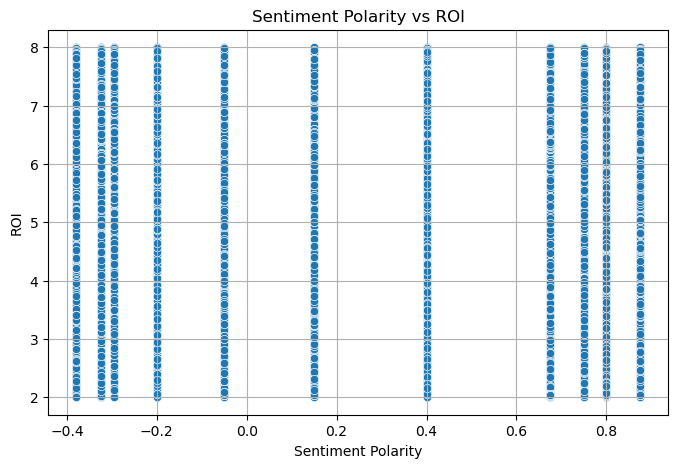

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Sentiment vs ROI
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sentiment_Polarity', y='ROI', data=df)
plt.title('Sentiment Polarity vs ROI')
plt.xlabel('Sentiment Polarity')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

- The above Visualization shows Relationship Between Sentiment and ROI

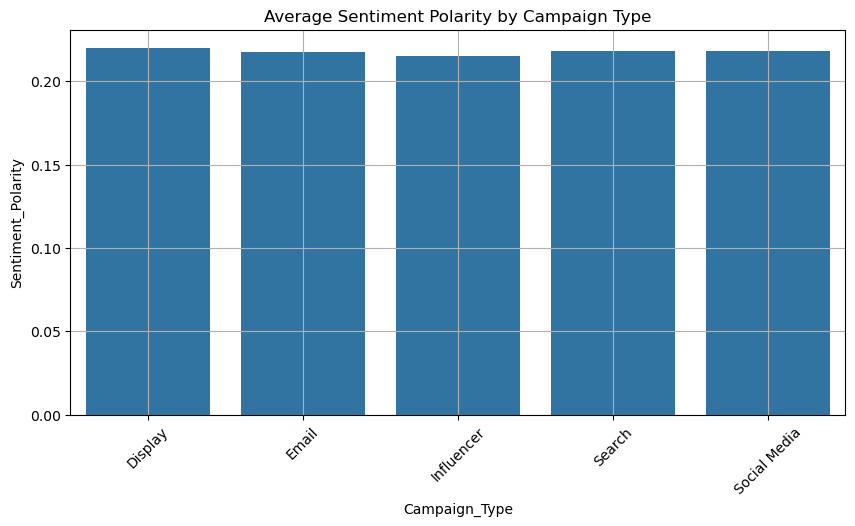

In [38]:
# Group by Campaign_Type
sentiment_by_type = df.groupby('Campaign_Type')[['Sentiment_Polarity', 'ROI']].mean().reset_index()

# Barplot
plt.figure(figsize=(10,5))
sns.barplot(x='Campaign_Type', y='Sentiment_Polarity', data=sentiment_by_type)
plt.title('Average Sentiment Polarity by Campaign Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- The above visualization shows Group Analysis: Average Sentiment vs Campaign Type

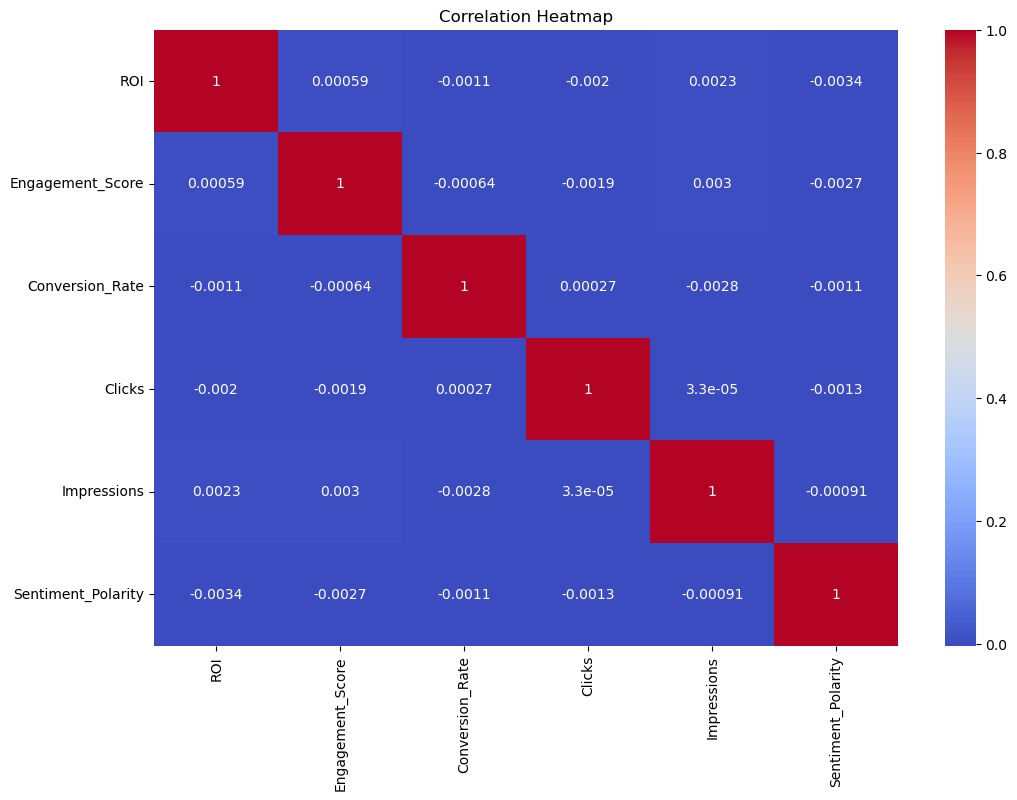

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['ROI', 'Engagement_Score', 'Conversion_Rate', 'Clicks', 
                'Impressions', 'Sentiment_Polarity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- The above visualization shows Correlation Heatmap

# Step 5: Building a Predictive Model
- Defining the Goal :
- Target Variable: ROI (You can change to Conversion_Rate later if needed)
- Features: campaign type, duration, channel, engagement score, sentiment, etc.

# Select Features & Preprocess

In [40]:
# Select features for modeling
features = ['Duration', 'Channel_Used', 'Engagement_Score', 'Sentiment_Polarity', 'Campaign_Type']
target = 'ROI'

# Create a new DataFrame
model_data = df[features + [target]].copy()

# One-hot encode categorical features
model_data = pd.get_dummies(model_data, drop_first=True)

# Split Data & Train a Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X = model_data.drop(target, axis=1)
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model

In [42]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.5466604786354903
MSE: 3.2770638581846114
R2 Score: -0.0880995446536812


# Step 6: Prescriptive Suggestions

- Analyze ROI by Campaign Type

In [43]:
roi_by_type = df.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)

print("📊 Average ROI by Campaign Type:\n")
print(roi_by_type)


📊 Average ROI by Campaign Type:

Campaign_Type
Influencer      5.011068
Search          5.008357
Display         5.006551
Email           4.994295
Social Media    4.991784
Name: ROI, dtype: float64


- Analyze ROI by Channel Used

In [44]:
roi_by_channel = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)

print("\n📊 Average ROI by Channel:\n")
print(roi_by_channel)



📊 Average ROI by Channel:

Channel_Used
Facebook      5.018699
Website       5.014167
Google Ads    5.003141
Email         4.996487
YouTube       4.993754
Instagram     4.988706
Name: ROI, dtype: float64


- Does Sentiment Affect ROI?

In [45]:
print("\n📊 Correlation between Sentiment and ROI:\n")
print(df[['Sentiment_Polarity', 'ROI']].corr())



📊 Correlation between Sentiment and ROI:

                    Sentiment_Polarity       ROI
Sentiment_Polarity            1.000000 -0.003393
ROI                          -0.003393  1.000000


# Step 7: Visual Dashboard 

-  Sentiment vs ROI (Scatter Plot)

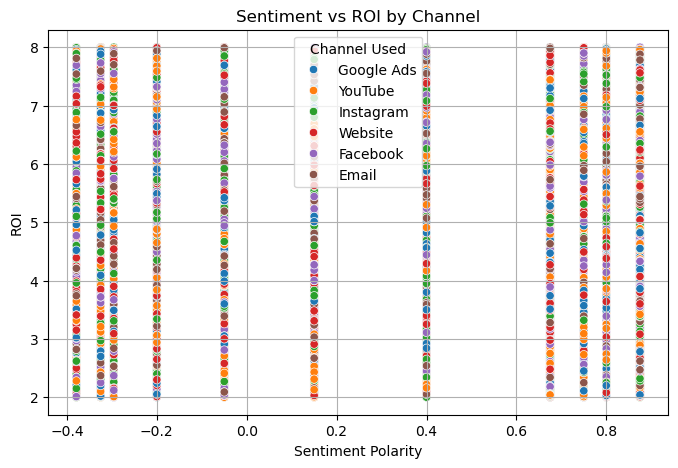

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sentiment_Polarity', y='ROI', hue='Channel_Used')
plt.title("Sentiment vs ROI by Channel")
plt.xlabel("Sentiment Polarity")
plt.ylabel("ROI")
plt.legend(title='Channel Used')
plt.grid(True)
plt.show()


- Average ROI by Campaign Type (Bar Chart)

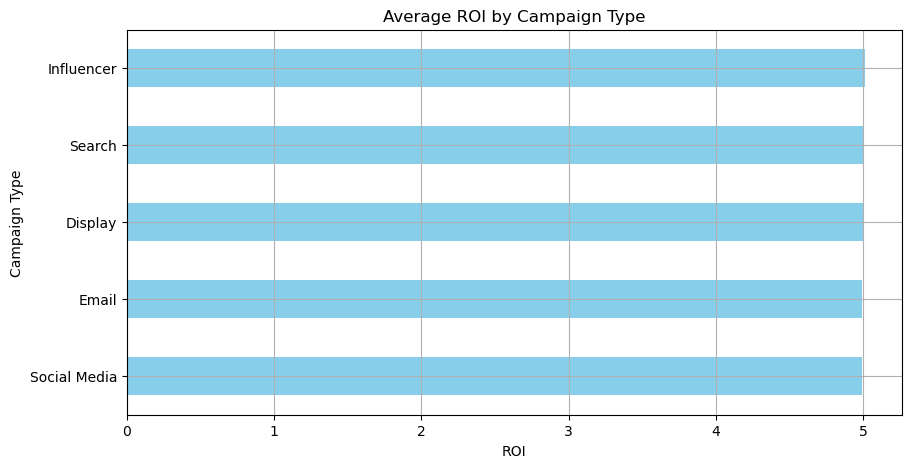

In [47]:
roi_by_type = df.groupby('Campaign_Type')['ROI'].mean().sort_values()

plt.figure(figsize=(10,5))
roi_by_type.plot(kind='barh', color='skyblue')
plt.title("Average ROI by Campaign Type")
plt.xlabel("ROI")
plt.ylabel("Campaign Type")
plt.grid(True)
plt.show()


- Conversion Rate vs Sentiment 

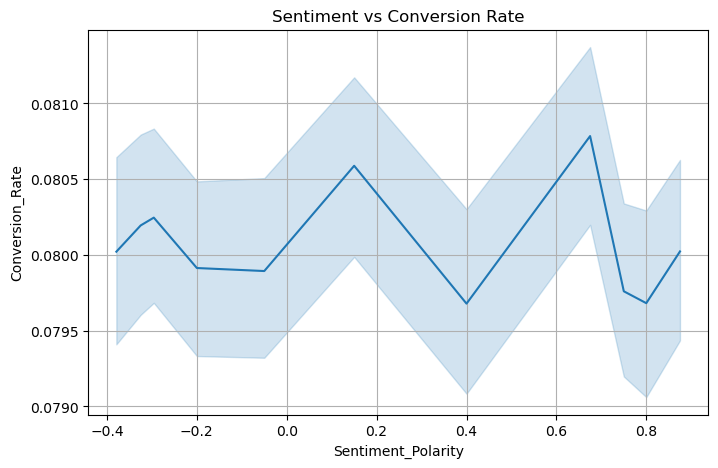

In [48]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Sentiment_Polarity', y='Conversion_Rate')
plt.title("Sentiment vs Conversion Rate")
plt.grid(True)
plt.show()
